# Netflix Dataset Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("max_columns",200)

### 1. Read the dataset first and try to understand our data.

In [2]:
df = pd.read_csv("netflix_titles_2021.csv")

In [3]:
df.head(3) #Here we can see our first 3 objects of our datasets.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
df.tail(3) #Here we can see our last 3 objects of our dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [10]:
df.shape #Dimensions of our dataset.

(8807, 12)

### 2.Data Preparation
- Here we check whether our dataset have any irrelevent columns.
- Null values.
- Duplicated columns.

In [11]:
[features for features in df.columns if df[features].isnull().sum()>0] #How many columns contains the null values.

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

In [12]:
df.isnull().sum() #Shows exact numbers of Null values in those columns.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##### Lets also, try to visualize these same null values on heatmap.

<AxesSubplot:>

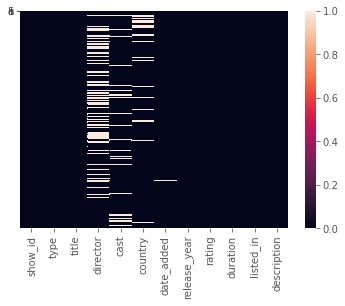

In [13]:
sns.heatmap(df.isnull(),yticklabels='False')

##### Here, we can clearly see in our heatmap that director column is has most of the missing values. And then cast and country.

#### Let's delete the director, cast, description, and duration columns from the dataset. The director and cast columns have a high number of missing values, and I do not see any future use for the other two columns in our feature understanding.

In [14]:
df1 = df.drop(['director','cast','description','duration'],axis=1)
df1

,show_id,type,title,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [15]:
df1.fillna({"country":'Missing',"date_added":"Missing","rating":"Missing"},inplace=True)

#### Here, we filled all our null value with a word "Missing".

In [16]:
df1.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
dtype: int64

##### We prepared our dataset for our next step which is feature understanding.

### 3.Feature Understanding
    Plotting Feature Distributions 

In [32]:
df1.type.value_counts().to_frame("Counts")

,Counts
Movie,6131
TV Show,2676


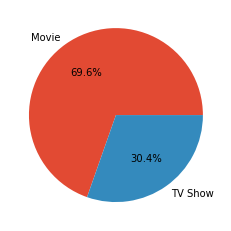

In [30]:
plt.pie(df1['type'].value_counts(),labels =["Movie","TV Show"],autopct="%1.1f%%")
plt.show()

#### Here, we can clearly see that Netflix host almost 70% of Movies in its website and 30% of TV shows.

#### Now, Lets take a look on, what top 5 countries released most of the content on Netflix.

In [67]:
df1.country.value_counts().to_frame("Counts") #changing series data in dataframe

,Counts
United States,2818
India,972
Missing,831
United Kingdom,419
Japan,245
...,...
"United States, Israel, Italy, South Africa",1
"United States, New Zealand, Japan",1
"United Kingdom, Kenya",1
"Canada, India, Thailand, United States, United Arab Emirates",1


Text(0, 0.5, 'Movie Released')

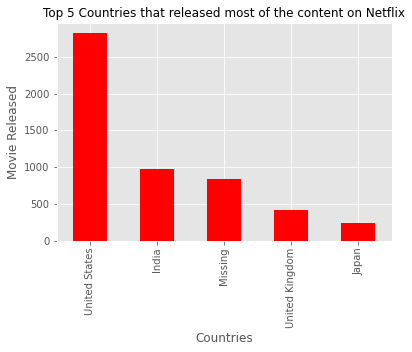

In [35]:
ax = df1["country"].value_counts() \
.head(5) \
.plot(kind='bar',color="red")
ax.set_title("Top 5 Countries that released most of the content on Netflix",fontsize=12)
ax.set_xlabel("Countries")
ax.set_ylabel("Movie Released")

##### The top five countries that have released content on Netflix are the United States, India, the United Kingdom, Japan, and South Korea.
The United States has released a staggering number of movies on Netflix, with over 2,500 titles. India is in second place with nearly 1,000 titles.

#### Now, lets see what kind of rating these movies and TV shows are rated on Netflix.

In [54]:
df1.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Missing', 'TV-Y7-FV', 'UR'], dtype=object)

In [51]:
df1.rating.nunique()


18

In [66]:
df1.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Missing        4
UR             3
NC-17          3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

#### Here, we can see there are 18 different kind of rating in here and lets visualize it.

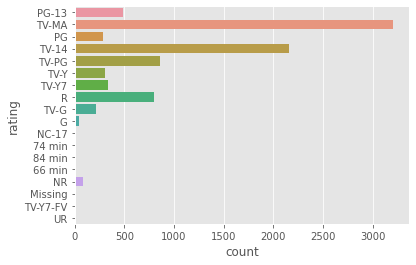

In [142]:
sns.countplot(y=df1['rating'],orient='h')
plt.xticks(rotation=0)
plt.show()

#### According to this plot
- Most Audience prefers TV-MA and TV-14 rated content.
- Less prefers UR, NC-17, 66min, 84min, and 74min.

#### Now, Let's take a look on what type of genre is more popular around the audience.

In [69]:
genre = df1['listed_in'].str.split(",",2) #Here we are making genre as a new column and taking first 3 genre from each rows.
genre

0                                         [Documentaries]
1       [International TV Shows,  TV Dramas,  TV Myste...
2       [Crime TV Shows,  International TV Shows,  TV ...
3                               [Docuseries,  Reality TV]
4       [International TV Shows,  Romantic TV Shows,  ...
                              ...                        
8802                   [Cult Movies,  Dramas,  Thrillers]
8803           [Kids' TV,  Korean TV Shows,  TV Comedies]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 8807, dtype: object

In [89]:
df1['Genre 1'] = genre.str.get(0)
df1['Genre 2'] = genre.str.get(1)
df1['Genre 3'] = genre.str.get(2)
df1.head(3)

,show_id,type,title,country,date_added,release_year,rating,listed_in,Genre 1,Genre 2,Genre 3
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,Documentaries,Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Missing,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure


#### We successfully got top 3 genre from each movies and tv shows section.

#### Now Let's take a look on what are the top sub-genre on each genre of our dataset.

In [94]:
df1['Genre 1'].describe(include=all)

count       8807
unique        36
top       Dramas
freq        1600
Name: Genre 1, dtype: object

In [97]:
df1['Genre 1'].value_counts().head(5) #Dramas are the dominant genre in our genre 1 selection.

Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: Genre 1, dtype: int64

In [99]:
df1['Genre 2'].describe(include=all) #International Movies are the dominant genre in our genre 2 selection.

count                      6787
unique                       37
top        International Movies
freq                       1722
Name: Genre 2, dtype: object

In [100]:
df1['Genre 3'].describe(include=all) #International Movies are the dominant genre in our genre 3 selection.

count                      3729
unique                       33
top        International Movies
freq                        902
Name: Genre 3, dtype: object

##### We should replace the subgenre name with the dominant genre name for a cleaner visualization.

In [111]:
df1.rename(columns={"Genre 1":"Dramas","Genre 2":"International Movies","Genre 3":"International Movies"},inplace=True)

#### Let's visualize our findings

Text(0.5, 1.0, 'Most Watched Genre on Netflix')

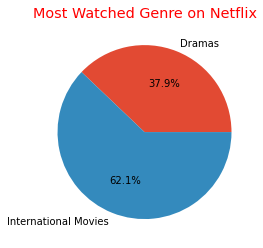

In [139]:
genre_types = ['Dramas','International Movies']
value_count = [1600,1722+902] #Added International Movies freq.
plt.pie(value_count,labels = genre_types, autopct="%1.1f%%")
plt.title("Most Watched Genre on Netflix",color="Red")

#### The pie chart shows that International Movies is the most watched genre on Netflix, with a 62%.

# Thank you! Suggestions or Feedbacks are always Welcome :)